# Metody Numeryczne - Labolatorium nr. 2 (Interpolacja) #

**Imię i Nazwisko:** Bartosz Polak  
**Numer Indeksu:** 267626  
**Kierunek:** Mechatronika  
**Data:** 09.10.2024  

---

In [100]:
import numpy as np  
import random
import pandas as pd

In [101]:
# listy z punktami z przedziału od 0 do 10 z krokiem 0.1
Points_x = np.arange(0, 10, 0.1)
Points_y = [None] * len(Points_x)

# ustawiamy co 10 wartość z listy na f(x) = x + (odchyłka)
for i in range(0, len(Points_x), 10):
    # odchyłka z przedziału -10 : 10 aby było dobrze widoczne na wykresie
    error = random.uniform(-10, 10)
    Points_y[i] = Points_x[i] + error

/tmp/ipykernel_1231/2196177930.py:25: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  ax = df[0:9].plot(y=['liniowa', 'kwadratowa', 'sześcienna', 'wielomianowa', 'schodkowa'],


Text(0, 0.5, 'Y')

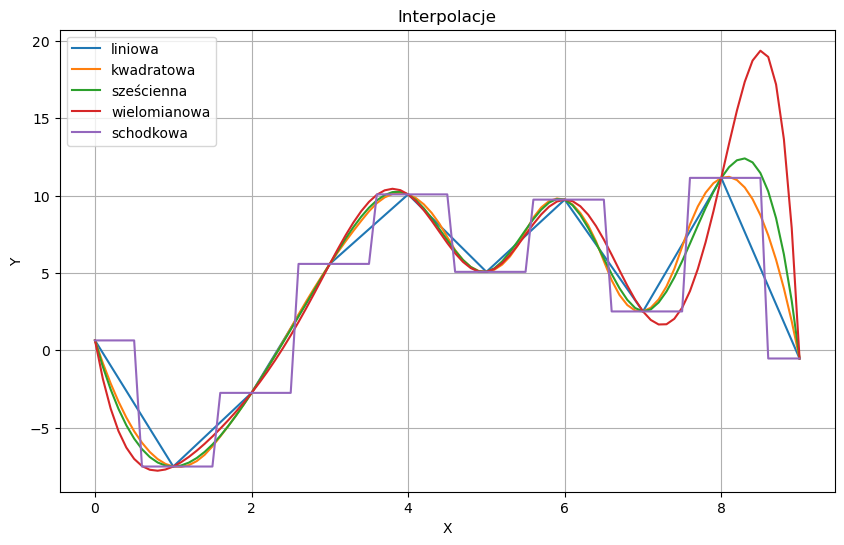

In [102]:
# tworzymy nową tabele danych z naszymi wartościami x i y
df = pd.DataFrame(data={"value": Points_y}, index=Points_x)

# tworzymy różne interpolacje na naszych danych
linear = df.interpolate(method='linear')
quadratic = df.interpolate(method='quadratic')
cubic = df.interpolate(method='cubic')
polynomial = df.interpolate(method='polynomial', order=5)
nearest = df.interpolate(method='nearest')

# towrzymy słownik aby przypisać każdej z interpolacji jej nazwę
interpolations = {
    "liniowa": linear,
    "kwadratowa": quadratic,
    "sześcienna": cubic,
    "wielomianowa": polynomial,
    "schodkowa": nearest
}

# tworzymy nowe colum ny danych z odpowiednimi interpolacjami
for name, interpolation in interpolations.items():
    df[name] = interpolation['value']

# tworzymy wykres ze wszytskimi typami interpolacji
ax = df[0:9].plot(y=['liniowa', 'kwadratowa', 'sześcienna', 'wielomianowa', 'schodkowa'], 
             figsize=(10, 6), grid=True, title="Interpolacje")

ax.set_xlabel("X")
ax.set_ylabel("Y")